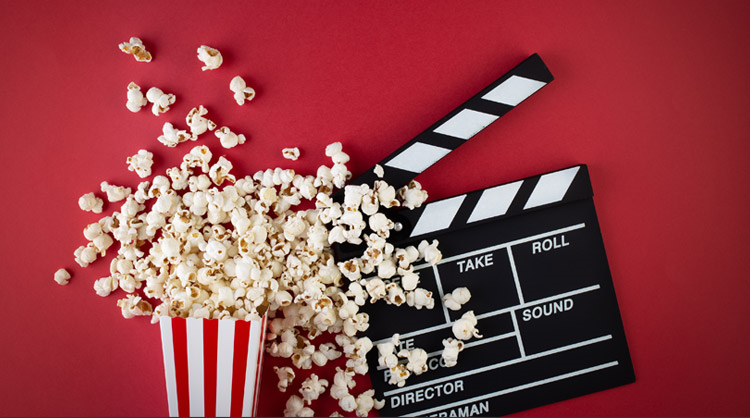

# Microsoft New Movie Studio Analysis

**Authors:** Diannah Wangura
***

## Overview

This project analyzes the basic needs of the Microsoft which is planning to open a new movie studio. Descriptive analysis of title ratings and title basics shows that the genre type of movie produced determines its numvotes at the box office. The head of Microsoft's new movie studio can use this analysis to decide what type of films to create.

## Business Problem
***
The head of Microsoft new movie studio will be able to narrow down to the movies that are most liked by people and thus reduce costs related with production of movies that do not have votes at the boxoffice. Doing so will allow the studio to rise up the ladder to other big companies and have better ratings in production.Using imdb title ratings and title basics, I describe consideration in production patterns in genres.
***

## Data Understanding
***
IMDB is is the world's most popular and authoritative source for movie and the data provided will help in knowing which movies have the highest rating and numvotes at the box office.The data has a unique id repreresented by the variable tconst which is allocated to each movie produced.The data files also provides the genre,averagerating,productionyear and numvotes of each movie properties
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titlebasics = pd.read_csv("imdb.title.basics.csv.gz")
titleratings = pd.read_csv("imdb.title.ratings.csv.gz")

## Titlebasics and Titleratings Data

This includes records of start_year,genres,averagerating and numvotes

In [4]:
titlebasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
titleratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Cleaning
For the titleratings and title basics, I make them easier to work with by joining them with the tconst column name and dropping unnecessary columns such as original tilte as its a replica of primary tilte.

Combining the two files yields a single dataset for feature engineering and analysis. I exclude any unmatched titleratings and title basics data to ensure there are no movies without ratings and numvotes. I will also drop runtime minutes as they have the highest nullvalues and will take a lot of time in filling them.

In [6]:
movies  = pd.merge(titlebasics, 
                              titleratings, 
                              on=['tconst'], 
                              how='left')
movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


In [7]:
# Check the number of nulls on each column
movies.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

For the runtime_minutes it shows there are 31,739 which have no values and I will drop them as they will take a signifanct amount of time in filling them and they have less impact on our analysis.
For the averagerating and numvotes I also will drop them as they did not ganer any ratings and votes and they wont be of help in the analysis.I willalso drop the genres with null values.

In [8]:
# drop runtime_minutes
movies.drop('runtime_minutes', axis = 1, inplace = True)

In [9]:
# drop the rows with null values in average rating and numvotes
movies.dropna(axis = 0, subset=['numvotes'], inplace=True)

In [10]:
# drop the genre with null
movies.dropna(axis = 0, subset=['genres'], inplace=True)

In [11]:
# drop originaltitle
movies.drop('original_title', axis = 1, inplace = True)

In [12]:
movies.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
averagerating    0
numvotes         0
dtype: int64

In [13]:
# View the cleaned data set
movies

,tconst,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
146114,tt9913056,Swarm Season,2019,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7,136.0
146125,tt9914642,Albatross,2017,Documentary,8.5,8.0


## Data Modeling

***

I will Create a dataset that shows the movies with the highest numvotes this will help me determine which type of genre is doing well in the box office

In [14]:
sorted_movies = movies.sort_values(by='numvotes', ascending=False)

# This data set shows the highest number of votes to the least 
movies_sorted_highest_numvotes = sorted_movies
movies_sorted_highest_numvotes

,tconst,primary_title,start_year,genres,averagerating,numvotes
7066,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,2012,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...
58705,tt3417906,The Nose,2013,Documentary,8.6,5.0
93803,tt5465608,Extramaterial,2016,Documentary,6.6,5.0
81438,tt4681636,Free Spaces,2015,Documentary,9.0,5.0
48978,tt2915328,Abou Al Oureef,2014,Comedy,5.2,5.0


In [46]:
# Filter my DataFrame to retain only movies with numvotes greater than 500k 
movies_filtered = movies_sorted_highest_numvotes[movies_sorted_highest_numvotes['numvotes'] > 500000]

# Sort the filtered DataFrame by numvotes in descending order
movies_filtered_sorted = movies_filtered.sort_values(by='numvotes', ascending=False)
movies_filtered_sorted

,tconst,primary_title,start_year,genres,averagerating,numvotes
7066,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,2012,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...
19050,tt1825683,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
42473,tt2543164,Arrival,2016,"Drama,Mystery,Sci-Fi",7.9,515483.0
5901,tt1211837,Doctor Strange,2016,"Action,Adventure,Fantasy",7.5,514510.0
190,tt0478970,Ant-Man,2015,"Action,Adventure,Comedy",7.3,501213.0


# Analysis on average rating and num of votesvotes

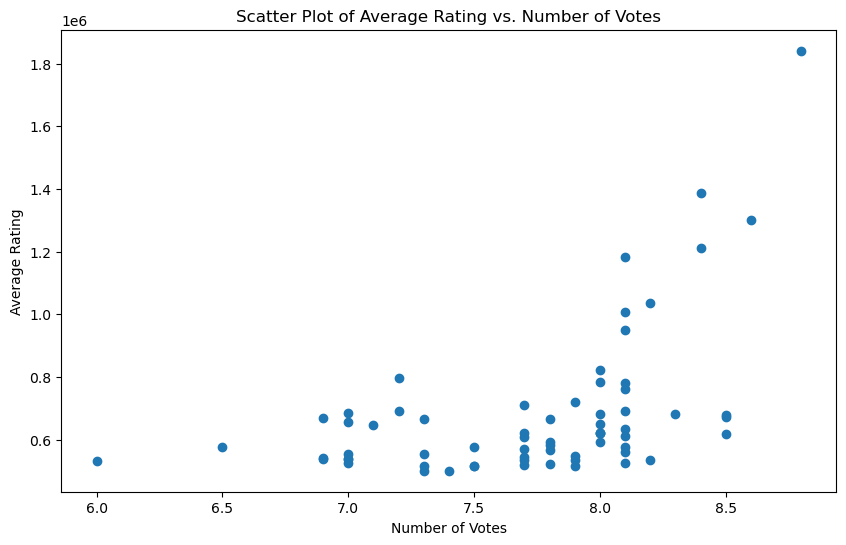

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_filtered_sorted['averagerating'], movies_filtered_sorted['numvotes'])
plt.title("Scatter Plot of Average Rating vs. Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
# plt.grid(True)
plt.show()


From the observation of the provided data, it seems that there is a general positive relationship between the average rating (averagerating) and the number of votes (numvotes). Movies with a higher number of votes tend to have higher average ratings. This relationship is common in many rating systems, where the more people vote on a movie, the more reliable and representative the average rating tends to be.

However,the relationship can have exceptions, and there are various factors that can influence a movie's average rating. For example, the genre, the quality of the movie, and individual preferences can all play a role in determining the average rating. Some movies may have a high average rating despite having a relatively low number of votes, while others may have a high number of votes but a lower average rating.

# Frequency of movies produced per year

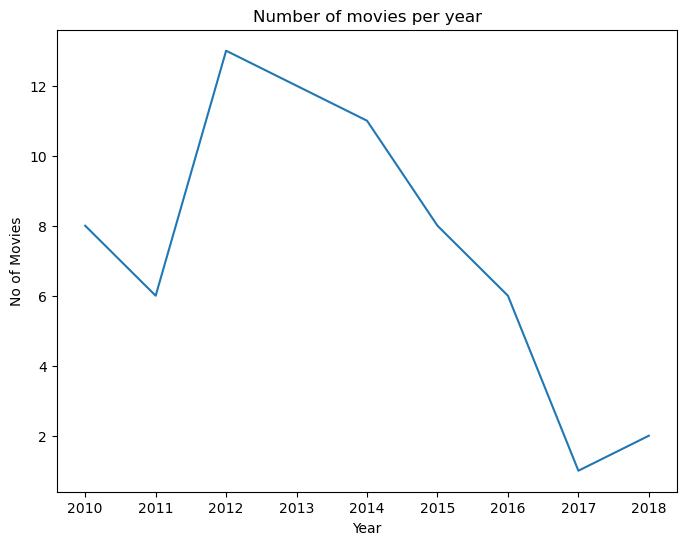

In [18]:
yearly_movie_counts = movies_filtered_sorted['start_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))

plt.plot(yearly_movie_counts.index, yearly_movie_counts.values,)

plt.xlabel('Year')
plt.ylabel('No of Movies')

plt.title('Number of movies per year')

plt.show()

The data set shows that 2012 was the highest peak production and in 2017 it dropped to just one this shows that the industry is subject to fluctuations, Microsoft new studio should consider strategic entry in periods of high demand that is a year with lowproduction could be a chance for them to pick up in the market with high quality films,this willl also help them in budget allocation in years with high production

# Analysis on the basis on genre

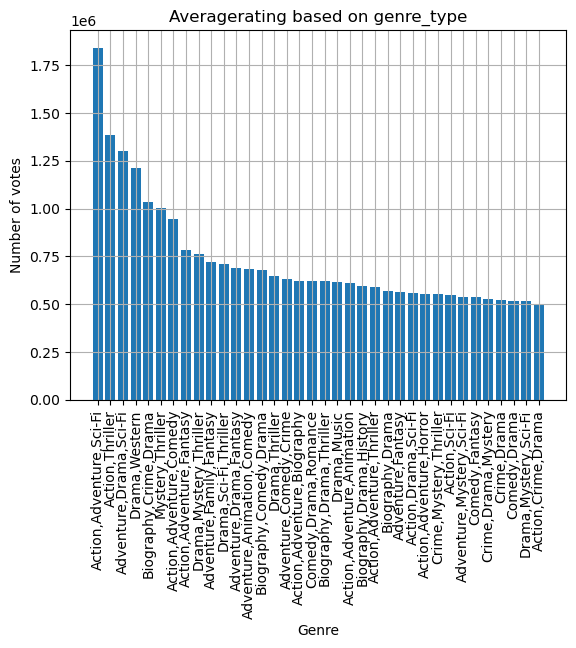

In [48]:
plt.bar(movies_filtered_sorted['genres'], movies_filtered_sorted['numvotes'])
plt.title("Averagerating based on genre_type")
plt.xlabel("Genre")
plt.ylabel("Number of votes")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The most produced movies are a combination of Action,Adventure and Sci-Fi and i would advise microsoft to consider producing movies with the same combination as they have the highest likelyhood of having the highest num of votes and they have a higher prefence among the audience

## Evaluation
***
The results show that there is need for consideration in the genre type of movies as they determine the num of votes a movie gets at the box ofice
I am highly confident that my results will generalize beyond this data as the movie with the highest number of votes means that its popular among viewers and theefore it generates higher returns
The model would fit the business because it gives an insight on the bugdet considerations and years production and its gives a niche on which movies they could enter the market with
***

## Conclusions
I would recommend Microsoft to venture into the business of movie creation as it has a broad audience who are eager for high quality movies and be consistent on productivity.They should also put quality budget so as to gain the rewards on popularity.
Limitations on the project would having data that dates past many years and the preferences may have changed currently among the viewers
For improvement in this project in future i could consider adding a dataset that shows the returns generated by each movie whether domestic or foreign returns
***